In [51]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [52]:
train  = pd.read_csv('competition_data/train.csv')
test  = pd.read_csv('competition_data/test.csv')

## Input Feature - Target 분리
train_x = train.drop(['nerdiness', 'index'],axis=1)   ## Input Feature 값
train_y = train['nerdiness']                 ## Target 값

In [53]:
## Test 문항에 대한 Column
test_cols = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10',
             'Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20',
             'Q21','Q22', 'Q23','Q24','Q25','Q26']

## 응시 시간 문항에 대한 Column
time_cols = ['introelapse', 'testelapse', 'surveyelapse']

## TIPI 문항에 대한 Column
tipi_cols = ['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6','TIPI7','TIPI8',
             'TIPI9','TIPI10']

vcl_exist = ['VCL1','VCL2','VCL3','VCL4','VCL5','VCL7','VCL8','VCL10','VCL11','VCL13','VCL14','VCL15','VCL16']
vcl_no_exist = ['VCL6','VCL9','VCL12']
## VCL 문항에 대한 Column
vcl_cols = vcl_exist + vcl_no_exist

## 설문문항에 대한 Column
survy_cols = ['country','education','urban','gender','engnat','age','hand','religion',
              'orientation','voted','married','familysize','ASD']

In [15]:

train_x[test_cols].describe()        ## Test 문항 Column 값 집산(평균, 표준편차, 최대/최소값...) 
                                                ## 이때, Null 값(결측치)들은 제외

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
count,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000,14928.000000,...,14963.000000,14937.000000,14947.000000,14955.000000,14961.000000,14962.000000,14950.000000,14939.000000,14956.000000,14932.000000
mean,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418,4.110598,...,3.941121,3.903461,3.385763,3.674022,2.968384,2.412846,3.835452,4.296740,3.151444,4.161465
std,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625,1.047617,...,1.136492,1.322643,1.546368,1.171751,1.609673,1.375515,1.360530,0.919564,1.376888,1.030046
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,3.000000,4.000000,2.000000,4.000000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,3.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
train_x[time_cols].describe(include='all')        ## 응시 시간 문항 Column 값 집산(평균, 표준편차, 최대/최소값...) 
                                                ## 이때, Null 값(결측치)들은 제외

,introelapse,testelapse,surveyelapse
count,15000.000000,15000.000000,1.500000e+04
mean,767.137733,387.965667,2.787959e+03
std,13835.948037,8513.031610,1.785955e+05
min,1.000000,1.000000,3.000000e+00
25%,4.000000,82.000000,1.260000e+02
50%,10.000000,106.000000,1.640000e+02
75%,36.000000,140.000000,2.170000e+02
max,855030.000000,474572.000000,1.516699e+07


In [17]:
train_x[tipi_cols].describe(include='all')       ## TIPI 문항 Column 값 집산(평균, 표준편차, 최대/최소값...) 
                                               ## 이때, Null 값(결측치)들은 제외

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
count,14947.000000,14934.000000,14921.000000,14936.000000,14930.000000,14938.000000,14936.000000,14935.000000,14936.000000,14920.000000
mean,2.623135,3.037565,3.466122,3.275308,3.876088,3.682287,3.529191,3.039103,3.161422,2.177413
std,1.150815,1.059533,0.999300,1.175920,0.911841,1.108197,1.015622,1.140791,1.067203,1.034280
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000
75%,3.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
train_x[vcl_cols].describe(include='all')        ## VCL 문항 Column 값 집산(평균, 표준편차, 최대/최소값...) 
                                               ## 이때, Null 값(결측치)들은 제외

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL7,VCL8,VCL10,VCL11,VCL13,VCL14,VCL15,VCL16,VCL6,VCL9,VCL12
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.958667,0.921667,0.529133,0.968400,0.947333,0.236000,0.436600,0.956067,0.280067,0.761133,0.90620,0.959867,0.980600,0.101533,0.067200,0.210267
std,0.199067,0.268704,0.499167,0.174939,0.223375,0.424636,0.495981,0.204954,0.449047,0.426405,0.29156,0.196278,0.137931,0.302044,0.250376,0.407512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
train_x[survy_cols].describe(include='all') ## 설문 문항 Column 값 집산(평균, 표준편차, 최대/최소값...) 
                                          ## 이때, Null 값(결측치)들은 제외


,country,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
count,14810,14833.000000,15000.000000,14981.000000,14953.000000,15000.000000,14953.000000,14755.000000,14601.000000,14915.000000,14918.000000,14681.000000,14911.000000
unique,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.314232,2.163867,1.703024,1.346018,26.740867,1.185113,4.098340,1.847956,1.633121,1.179917,2.744091,1.938703
std,NaN,0.921192,0.728274,0.553286,0.475715,317.058436,0.481993,3.425699,1.223191,0.481969,0.465985,24.109344,0.239882
min,NaN,1.000000,0.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.000000,2.000000,1.000000,1.000000,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000
50%,NaN,2.000000,2.000000,2.000000,1.000000,20.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000
75%,NaN,3.000000,3.000000,2.000000,2.000000,27.000000,1.000000,6.000000,2.000000,2.000000,1.000000,3.000000,2.000000


#### 각 Column 별 고유값들(NaN 값 제외)을 알아봅시다.

In [20]:
col_val_dict = {}

for col_name in train.columns[1:]:
    col_val_nan = train.loc[:,col_name].unique()
    if col_val_nan.dtype == 'object':
        print(f'{col_name} 고유 값들 : {list(col_val_nan)}')
        continue
    col_val = col_val_nan[~np.isnan(col_val_nan)]
    print(f'{col_name} 고유 값들 : {list(col_val.astype(np.int64))}')


Q1 고유 값들 : [1, 4, 5, 3, 2]
Q2 고유 값들 : [5, 4, 3, 2, 1]
Q3 고유 값들 : [5, 4, 3, 2, 1]
Q4 고유 값들 : [5, 4, 2, 3, 1]
Q5 고유 값들 : [1, 4, 3, 5, 2]
Q6 고유 값들 : [4, 5, 3, 2, 1]
Q7 고유 값들 : [5, 4, 3, 2, 1]
Q8 고유 값들 : [5, 4, 2, 3, 1]
Q9 고유 값들 : [1, 3, 4, 5, 2]
Q10 고유 값들 : [3, 4, 5, 2, 1]
Q11 고유 값들 : [5, 1, 2, 4, 3]
Q12 고유 값들 : [5, 4, 2, 3, 1]
Q13 고유 값들 : [5, 2, 3, 1, 4]
Q14 고유 값들 : [5, 3, 4, 2, 1]
Q15 고유 값들 : [5, 1, 4, 3, 2]
Q16 고유 값들 : [5, 2, 3, 1, 4]
Q17 고유 값들 : [5, 4, 1, 2, 3]
Q18 고유 값들 : [1, 5, 3, 2, 4]
Q19 고유 값들 : [5, 1, 4, 3, 2]
Q20 고유 값들 : [5, 3, 2, 4, 1]
Q21 고유 값들 : [1, 2, 3, 4, 5]
Q22 고유 값들 : [5, 1, 4, 2, 3]
Q23 고유 값들 : [1, 5, 2, 3, 4]
Q24 고유 값들 : [5, 3, 4, 1, 2]
Q25 고유 값들 : [1, 2, 4, 3, 5]
Q26 고유 값들 : [1, 5, 2, 4, 3]
country 고유 값들 : ['USA', 'NLD', 'ITA', 'ARE', 'DNK', 'GRC', 'QAT', 'GBR', 'ROU', 'HUN', 'AUS', 'POL', 'CAN', 'ARG', 'FRA', 'DEU', 'UKR', 'BGR', 'PAK', 'EST', 'PHL', 'SVN', nan, 'SRB', 'NZL', 'SWE', 'MAR', 'IDN', 'HKG', 'LUX', 'CHE', 'MYS', 'RUS', 'BRA', 'NOR', 'PRT', 'MEX', 'IND', 

+ 데이터 변수 설명
  + 식별가능한 Column
    + Q1 ~ Q5, Q7 ~ Q13, Q15 ~ Q17, Q19 ~ Q20 (기존 MACH-IV 문항) - 모든 문항에 결측치 포함
      + 1,2,3,4,5 로 각 문항에 동의 정도 표시
        + 추정 - (5:매우동의, 4:약간동의, 3:그저그럼, 2:약간동의하지않음, 1:매우동의하지않음)
    + Introelapse : 테스트 소개 페이지(Intro 페이지)에서 머문 시간 (초 단위 측정) - 결측치 없음
    + testelapse : 테스트 페이지(Q1 ~ Q26)에서 머문 시간 (초 단위 측정) - 결측치 없음
    + surveyelapse : 설문 페이지(나머지 문항)에서 머문 시간 (초 단위 측정) - 결측치 없음
    + TIPI 1~10 문항 : 마키아벨리즘_개요_데이터.pdf 참고 - 모든 문항에 결측치 포함
      + 원래 TIPI 는 1 ~ 7 의 숫자로, 성향에 해당하는 정도를 표현하나, 대회 특 데이터는, 3,4,5 를 하나의 번호로 통일시킴 (1~5 만 존재)
    + VCL 1~16 문항 : 마키아벨리즘_개요_데이터.pdf 참고 - 결측치 없음
      + 알고있는지 여부에 따라 1,0 선택
        + 추정 - (알고 있으면 1, 모르면 0)
    + country : 테스트 응시자가 접속한 네트워크 위치 (나라) - 결측치 포함
      + 문자열 타입으로, 3~4 자리 국가 코드가 할당
    + education : 알수 없음 - 결측치 포함
      + 응답값 4,3,2,1
    + gender : 알수 없음 - 결측치 포함
      + 응답값 3,2,1
    + engnat : 알수 없음 - 결측치 포함
      + 응답값 2,1
    + urban : 알수 없음  - 결측치 없음
      + 응답값 3,2,1,0
    + hand : 알수 없음 - 결측치 포함
      + 응답값 3,2,1
    + religion : 알수 없음 - 결측치 포함
      + 응답값 12 ~ 1 까지의 수
    + orientation : 알수 없음 - 결측치 포함
      + 응답값 5,4,3,2,1
    + voted : 알수 없음 - 결측치 포함
      + 응답값 2,1
    + married : 알수 없음- 결측치 포함
      + 응답값 3,2,1
    + age : 알수 없음 - 결측치 없음
      + 응답값 자유롭게 수치 입력
    + familysize : 알수 없음 - 결측치 포함
      + 응답값 자유롭게 수치 입력
    + ASD : 알수 없음 - 결측치 포함
      + 응답값 2,1
    + nerdiness : 알수 없음 - 결측치 없음
      + 응답값 1,0
  + 비식별화된 Column
    + Q6 : 테스트 6번 문항
    + Q14 : 테스트 14번 문항
    + Q18 : 테스트 18번 문항
    + Q21 ~ Q26 : 테스트 21번 ~ 26번 문항

In [46]:
print(f'전체 행의 개수 : {len(train[train.any(axis=1)])}')
print(f'결측치 가진 행의 개수 : {len(train[train.isna().any(axis=1)])}')

전체 행의 개수 : 15000
결측치 가진 행의 개수 : 2361


### 정보가 없는 Column 의 의미 유추

+ Q6 - 순서형 
  + Honesty is the best policy in all cases.<br>(어떠한 경우에도 정직이 최선의 방책이다.)
+ Q14 - 순서형
  + Most people are brave.<br>(대부분의 사람들은 용감하다.)
+ Q18 - 순서형
  + It is hard to get ahead without cutting corners here and there.<br>(편법을 쓰지 않는다면 출세하기 힘들다.)
+ education - 순서형
  + 응답값 4,3,2,1
  + 추정 - (교육의 수준 (본인 최고 학력), 4:Graduate degree(석사 이상), 3:University degree(학사 이상), 2:High school(고졸), 1:Less than high school(고졸 미만))
+ gender - 범주형
  + 응답값 3,2,1
  + 추정 - (개인의 성별, 1:Male, 2:Female, 3:Other(기타))
+ engnat - 범주형
  + 응답값 2,1
  + 추정 - (영어가 모국어인지 여부, 2:No, 1:Yes)
+ urban - 범주형
  + 응답값 3,2,1,0
  + 추정 - (어릴적 살았던 지역이 도심에 얼마나 가까운지 여부, 숫자가 클수록, 도심지역에 가까운 지역일 듯, 1=Rural (country side), 2=Suburban, 3=Urban (town, city))
+ hand - 범주형
  + 응답값 3,2,1
  + 추정 - (어느 손을 주로 사용하는가 여부, 3:Both, 2:Left, 1:Right)
+ religion - 범주형
  + 응답값 12 ~ 1 까지의 수
  + 추정 - (개인의 종교, 1:Agnostic(불가지론자), 2:Atheist(무신론자), 3:Buddhist, 4:Christian (Catholic), 5:Christian (Mormon), 6:Christian (Protestant), 7:Christian (Other), 8:Hindu, 9:Jewish, 10:Muslim, 11:Sikh, 12:Other)
+ orientation - 범주형
  + 응답값 5,4,3,2,1
  + 추정 - (성적 취향, 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other)
+ voted - 범주형
  + 응답값 2,1
  + 추정 - (최근 국가선거 투표 여부, 1=Yes, 2=No)
+ married - 범주형
  + 응답값 3,2,1
  + 추정 - (기혼상태, 1=Never married, 2=Currently married, 3=Previously married)
+ familysize - 순서형
  + 응답값 자유롭게 응답
  + 추정 - (친가족 내에서, 자신을 포함한 자식(형제자매)의 수)
+ ASD - 범주형
  + 응답값 2,1
  + 추정 - (자폐 진단 경험 여부, 1=yes, 2=no)
    
> 위의 응답값 선택지 예측은, 아래의 두 링크를 기반으로 진행
    > + https://www.kaggle.com/datasets/lucasgreenwell/nerdy-personality-attributes-scale-responses?datasetId=690397
    > + https://dacon.io/en/competitions/official/235647/talkboard/401534?page=1&dtype=recent

### 이상치 데이터 분포를 관찰

+ <b>테스트 응시 시간에 대한 분포 관찰</b>
  + Introelapse, Testelapse, Surveyelapse 의 경우 모두 구간의 너비(최댓값과 최솟값의 차)가 매우 큼
  + Introelapse, Testelapse, Surveyelapse 의 하위 95% 경계값 조사 결과를 통해 대부분의 값들이 아래의 구간에 위치함을 알게됨
    + $1 \leq introelapse \leq 1000$
    + $1 \leq testelapse \leq 300$
    + $1 \leq surveyelapse \leq 400$

+ Introelapse, Testelapse, Surveyelapse, 하위 95% 구간에 대한 분포 관찰

In [65]:
'''
intr_95q, test_95q, srvy_95q = train_x[time_cols].quantile(q=0.95,interpolation='nearest') ## 하위 95% 경계값 조사

print(f'introelapse 하위 95% 경계값 : {intr_95q}')
print(f'testelapse 하위 95% 경계값 : {test_95q}')
print(f'surveyelapse 하위 95% 경계값 : {srvy_95q}')
'''

introelapse 하위 95% 경계값 : 976
testelapse 하위 95% 경계값 : 290
surveyelapse 하위 95% 경계값 : 381


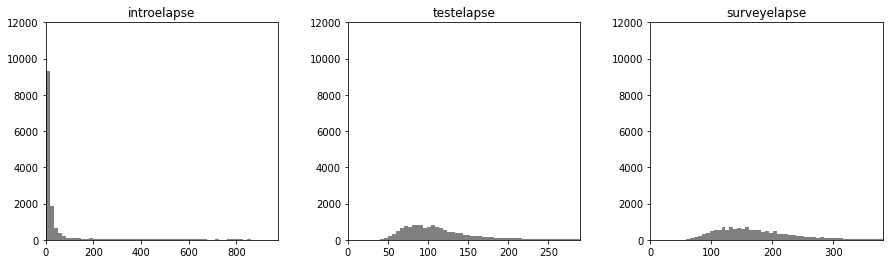

In [66]:
'''
fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3, figsize=(15, 4))
axs = [ax1,ax2,ax3]

quan_95s = [intr_95q,test_95q,srvy_95q]

for n in range(0,len(axs)):
    axs[n].hist( train_x[time_cols[n]],bins=np.linspace(1,quan_95s[n],60), facecolor='gray', align='mid')
    axs[n].axis([0, quan_95s[n], 0, 12000])
    axs[n].set_title(f'{time_cols[n]}')

plt.subplots_adjust(wspace=0.3)
'''

+ <b>age 에 대한 분포 관찰</b>

(0.0, 49.0, 0.0, 12000.0)

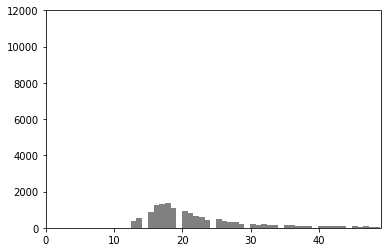

In [67]:
'''
age_95q = train_x['age'].quantile(q=0.95,interpolation='nearest')
plt.hist(train_x['age'], bins = np.linspace(0,age_95q,60), facecolor='gray', align='mid')
plt.axis([0,age_95q,0,12000])
'''

+ <b>familysize 에 대한 분포 관찰 (하위 99% 경계값)</b>


(0.0, 7.0, 0.0, 12000.0)

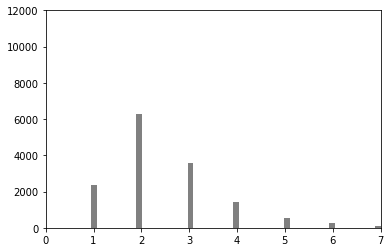

In [68]:
'''
family_99q = train_x['familysize'].quantile(q=0.99,interpolation='nearest')
plt.hist(train_x['familysize'], bins = np.linspace(0,family_99q,60), facecolor='gray', align='mid')
plt.axis([0,family_99q,0,12000])
'''

### 이상치가 있는 행 처리
+ <b>이상치가 존재하는 Column 들을 알아봅시다</b>
  + 위에서 데이터 분포 관찰결과, introelapse, testelapse,surveyelapse, age, familysize 의 경우, 이상치가 있을 것으로 추측됨.
    + why? : 이상치의 경우, 데이터 전체 패턴에서 동떨어져 있는 관측치를 말하는데, 이는 <b>평균뿐만 아니라 분산에도 영향을 미치기 때문 (실제로, (평균,표준편차) 와 하위 75% 경계값을 비교해보면, 대부분의 데이터값들이, 평균보다 한없이 작은 구간에 분포하고 있음을 알수 있음.)</b>에 결국은 데이터 전체의 안정성을 저해할 가능성 존재
+ 이상치를 판별하는 기준은 무엇인가?
  + 각 Column 별 도메인을 고려 (이번 실습에서는 해당 방법 사용)
    + 나이로 추정한 age의 경우, 100 세 부터는 신뢰도가 많이 떨어지는 데이터일 가능성 높음. 따라서, 100세 이상의 값을 갖는 Row 들 전부 삭제(혹은 대치) 가능
    + 테스트 소개글에 대한 소요시간인 introelapse의 경우, 하위 92% (545) 부터 급격하게 증가함을 확인하였음. 따라서, 해당 값 이상의 값들을 가진 Row 들 전부 삭제(혹은 대치) 가능. introelapse 값이 작은 경우는 고려하지 않아도 됨(음수가 아닌 이상). 보통, 소개글 부분은 안 읽고 넘기는 경우가 많기 때문. 무엇보다도, 테스트의 신뢰도에 영향을 끼치는 것은, 실제 테스트/설문 문항에 응시한 시간이지, intro 부분은 크게 신뢰도에 영향을 끼치지 못할 것이라 판단
    + 설문문항에 대한 소요 시간인 surveyelapse의 경우, 일반적으로 소요 시간이 클수록 설문의 신뢰도가 높다고 할수는 있으나, 이상치(극단적으로 높은 값)들에 대한 신뢰도는 판단하기 애매한 부분이 있으므로, 실제 openpsychomtrics 의 데이터셋을 통해 이상치 데이터들의 의미 존재여부 판단.
      + 실제 openpsychomtrics 의 데이터셋의 경우, 테스트 설문 소요시간이 M 단위가 다수 분포. 따라서, 대회에서 주어진 데이터셋에서 극단적으로 큰 이상치들을 따로 제거하지 않기로함.
      + 대신, 극단적으로 작은 이상치들의 경우, 따로 제거가 필요할 것으로 보이는데. 너무 짧은 시간값의 경우, 설문/테스트의 신뢰성과 연결되기 때문. 따라서,surveyelapse 가 하위 0.04% 부터 꾸준히 비슷한 간격으로 증가하는 것을 토대로, 하위 0.04% 미만의 Row 들을 전부 삭제
(혹은 대치) 가능 
      + 동시에, 이상치들의 값이 너무 커, surveyelapse, testelapse,introelapse 의 경우, 수치형/연속형 변수(TIPI 분야별 점수, MACH 점수, 나이, surveyelapse, testelapse,introelapse)들과 함께 표준화(StandardScaler) 필요할 것으로 보임.
    + 테스트 소요시간(testelapse)의 경우도, 상기 surveyelapse 와 동일하게 표현
    + familysize 의 경우, 39 이상의 값을 갖는 (39, 2919) Row 만 제거

In [69]:
##fig = px.box(train_x['familysize'], y='familysize')         ## Age 에 대한 Boxplot
##fig.show()

In [70]:
##fig = px.box(train_x['age'], y='age')         ## Age 에 대한 Boxplot
##fig.show()

In [71]:
##fig = px.box(train_x['introelapse'], y='introelapse') ## testelapse 에 대한 Boxplot
##fig.show()

In [72]:
##fig = px.box(train_x['testelapse'], y='testelapse') ## testelapse 에 대한 Boxplot
##fig.show()

In [73]:
##fig = px.box(train_x['surveyelapse'], y='surveyelapse')  ## surveyelapse 에 대한 Boxplot
##fig.show()

In [54]:
## Age 값 100 이상의 값을 갖는 Row 들 전부 삭제
train_x_no_outli = train_x[train_x['age'] < 100] 

## introelapse 하위 92% (545) 이상의 값을 갖는 Row 들 전부 삭제
intr_92q = train_x_no_outli['introelapse'].quantile(q=0.92,interpolation='nearest')
train_x_no_outli=train_x_no_outli[train_x_no_outli['introelapse'] < intr_92q]

## testelapse 하위0.04% 미만의 값을 갖는 Row 들 전부 삭제
test_004q = train_x_no_outli['testelapse'].quantile(q=0.0004,interpolation='nearest')
train_x_no_outli=train_x_no_outli[train_x_no_outli['testelapse'] >= test_004q]

## surveyelapse 하위 0.2% 미만의 값을 갖는 Row 들 전부 삭제
srvy_04q = train_x_no_outli['surveyelapse'].quantile(q=0.002,interpolation='nearest')
train_x_no_outli=train_x_no_outli[train_x_no_outli['surveyelapse'] >= srvy_04q]

## familysize 에 극단적으로 큰값(2919) 를 갖는 Row 제거
train_x_no_outli=train_x_no_outli[train_x_no_outli['familysize'] < 39]

In [55]:

## 결측치를 가진 행의 개수 파악 (전체 행의 갯수는 15000 개)
print(f'이상치 및 무의미한 값 제거 뒤 행의 개수 : {len(train_x_no_outli[train_x_no_outli.any(axis=1)])}')
print(f'결측치 가진 행의 개수 : {len(train_x_no_outli[train_x_no_outli.isna().any(axis=1)])}')


이상치 및 무의미한 값 제거 뒤 행의 개수 : 13459
결측치 가진 행의 개수 : 1872


### 결측 값 처리

+ <b>결측값 가진 행을 삭제</b>
  + 이상치 처리 후 13759 개의 Row 들만 존재. 여기서, 2361 개의 결측치 가진 Row 들을 제거하는 경우, 11000 여개의 Row 들만 남는 것이 됨. 데이터의 $\frac{1}{3}$ 을 사용하지 않는 셈.... (결측치를 대체하는 방법으로 가야겠다.!!)
+ <b>연속형 변수(elapse 값들) 들은 평균의 반올림으로, 이산형 변수들은 최빈값으로 대체하는 방법 사용</b>
  + Column 들 간 관련성이 가진 의미를 해칠 수 있음.(but, 가장 간편한 기본적 방법)

In [56]:
continuous_nan = ['age','introelapse','testelapse','surveyelapse']             ## 연속형 변수
norminal_nan = list(train_x_no_outli.columns.values)                         
for cont in continuous_nan:
    norminal_nan.remove(cont)

## 이산형 변수 discretious 완성

In [57]:
## 연속형 변수들에 대해서는 평균값으로 대체
train_x_no_outli[continuous_nan] = train_x_no_outli[continuous_nan].fillna(round(train_x_no_outli[continuous_nan].mean()))

## 이산형 변수들에 대해서는 최빈값으로 대체
train_x_no_outli[norminal_nan] = train_x_no_outli[norminal_nan].fillna(train_x_no_outli[norminal_nan].mode().iloc[0].squeeze())

+ <b> XGBoost 사용하여, 손실함수값 최소화되는 방향으로 결측값 대체</b>

+ <b>K-NN 알고리즘 사용하여 대체</b>

### Column 들 간 관계 파악

+ <b>테스트 문항들간 관계 파악</b>

<AxesSubplot:>

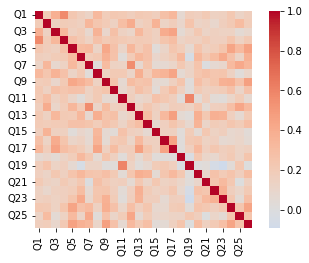

In [23]:
train_testcols_nan = train_x[test_cols].dropna()
correlations = train_testcols_nan.corr(method='spearman')
##correlations.mean
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)
## 먼저 original 훈련 셋에서, 질문문항들에 대하여, 결측값이 있는 행 모두 제거
#correlations = train_x[test_cols].corr(method = 'spearman') ## spearman 상관계수 사용
#sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

+ 절망스럽게도, 문항들 간 눈에띄는 상관관계가 포착되지 않음....
  + 그나마, Q19-Q11, Q4-Q1,Q12-Q7 정도가 통계적으로 강력한 양의 상관관계(0.5 이상)를 가지고 있음

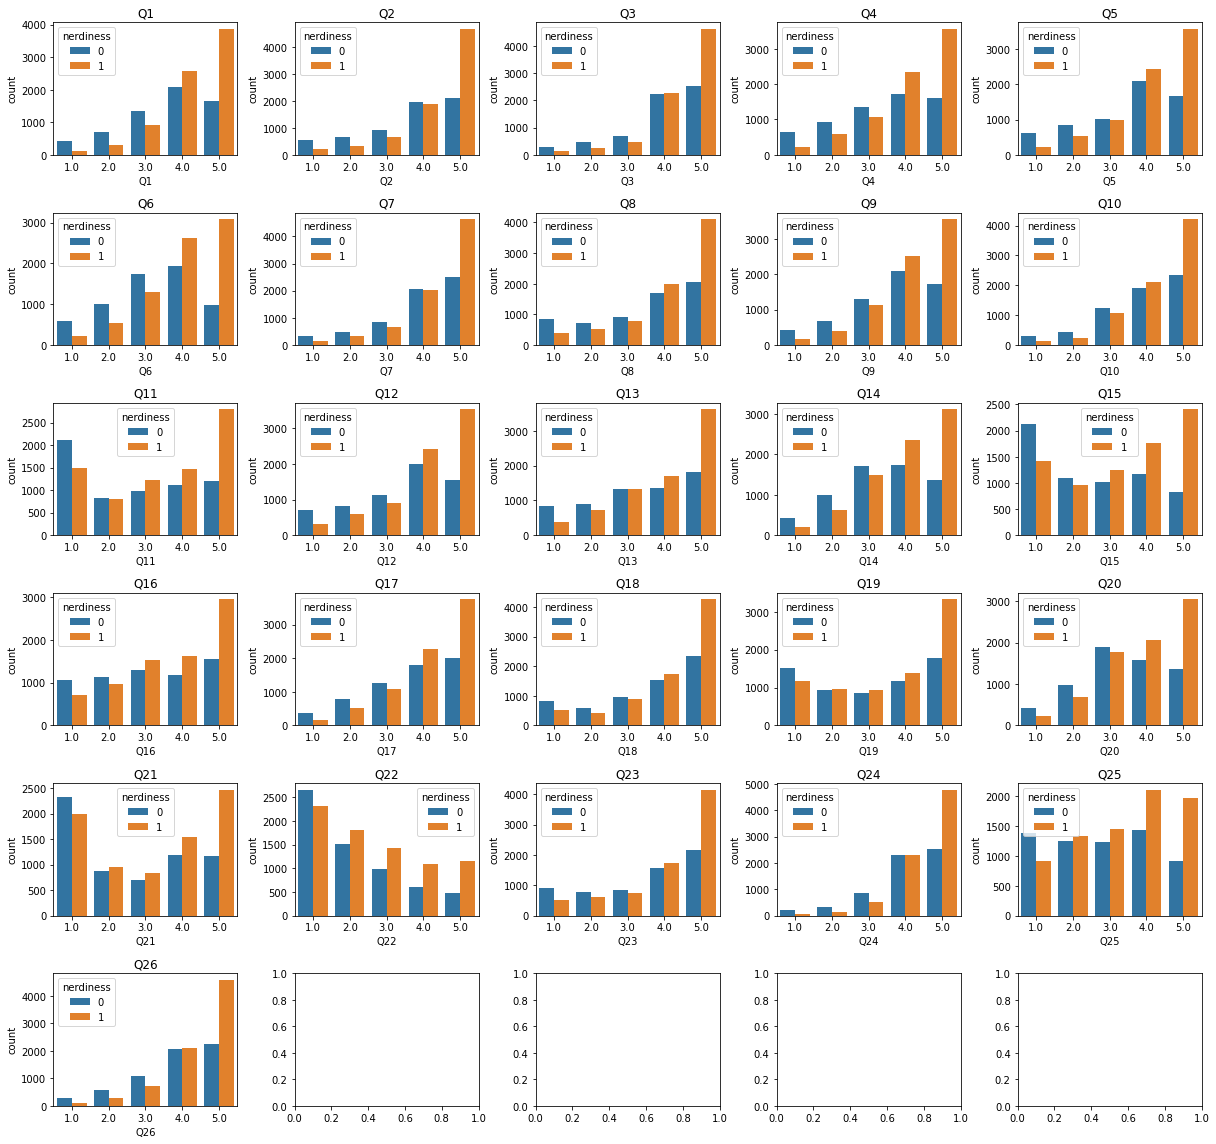

In [24]:
temp_testQ = train[test_cols+['nerdiness']].dropna()
fig,axes = plt.subplots(6,5, figsize=(17,16))
for f, ax in zip (test_cols, axes.ravel()):
    sns.countplot(data=temp_testQ[[f]], x=f,ax=ax, hue=temp_testQ['nerdiness'])
    ax.set_title(f)
    fig.tight_layout()


+ 위의 문항들을 MACH-IV 로 해석할 것인가?
  + MACH-IV 로 해석하기 위해서는, 나머지 21~26 문항에 대한 부호(양/음)해석이 필요함. 공교롭게도, 해당 문항들은 Secret 처리가 되어있기에, 타문항들 간의 상관관계(spearman 상관계수)를 사용하여 양음부호를 해석하기로 했으나, 상기 Cell 에서 보았듯이, 문항들 간 뚜렷한 양음 관계를 파악할 수 없었음.
  + MACH-IV 로 해석하긴 어렵고, 위의 모든 문항들응답 점수가 높을수록, Nerdiness 의 응답 비중이 증가한다는 경향을 이용하여, Nerdiness 의 응답 비중과 점수 간의 양의 관계에 있다고 가설을 설정하고, 모든 문항의 점수의 합을 계산하여, 새로운 Column 에 추가한다. 또한, 명확히,Nerdiness, Non-Nerdiness 비율차가 확인되는, Q15, 25 (점수가 작을 수록, Non-Nerdiness 의 절대적 수치 증가, 점수가 커질수로록, Nerdiness 의 절대적 수치 증가) 또한 학습 데이터에 포함시킨다. (그외의 테스트 문항 삭제)
  + 또다른 방법으로는, LDA(선형 판별 분석)를 사용하여, 26개의 문항들 중, Nerdiness 와 Non-Nerdiness Class 를 최대한 명확하게 구분해줄 수 있는 문항조합들을 찾아서, 해당 문항들만을 가지고 테스트 점수 합을 계산하는 방법이다(이건 나중에... 시간되면...). 

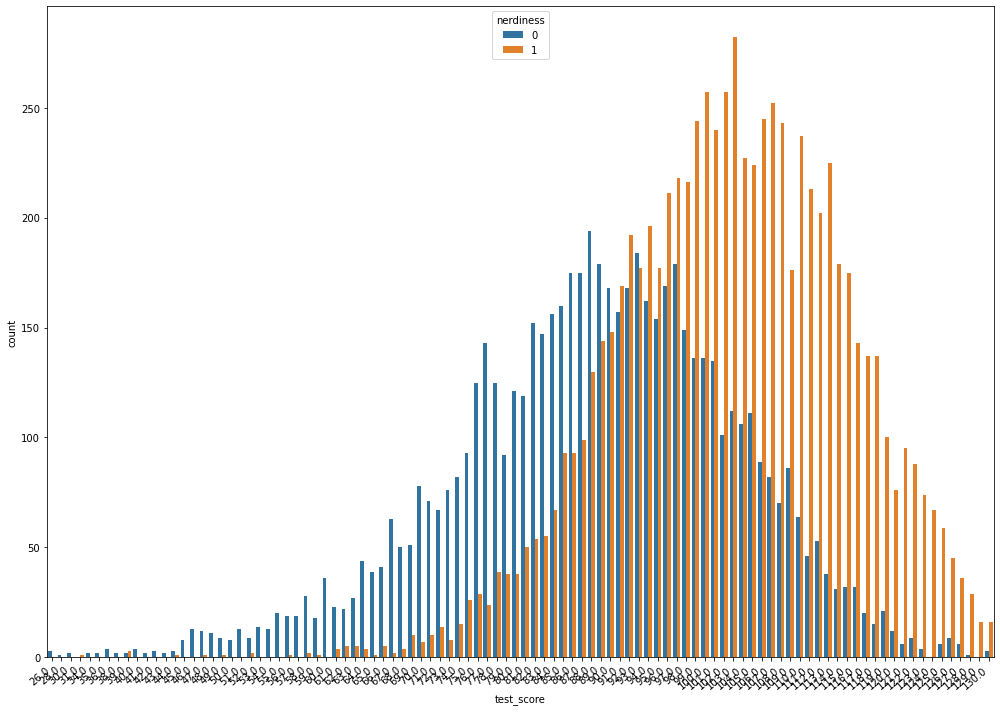

In [25]:
temp_test_cols=test_cols.copy()

temp_testQ['test_score'] = temp_testQ[temp_test_cols].sum(axis=1)
fig, ax = plt.subplots(figsize=(14,10))
sns.countplot(data=temp_testQ[['test_score']], x='test_score',ax= ax, hue=temp_testQ['nerdiness'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

+ 일반적으로, 테스트 총 점수는 Nerdiness 라고 진단한 사람에서가, Non-Nerdiness 라고 진단한 사람에서보다 많았다.

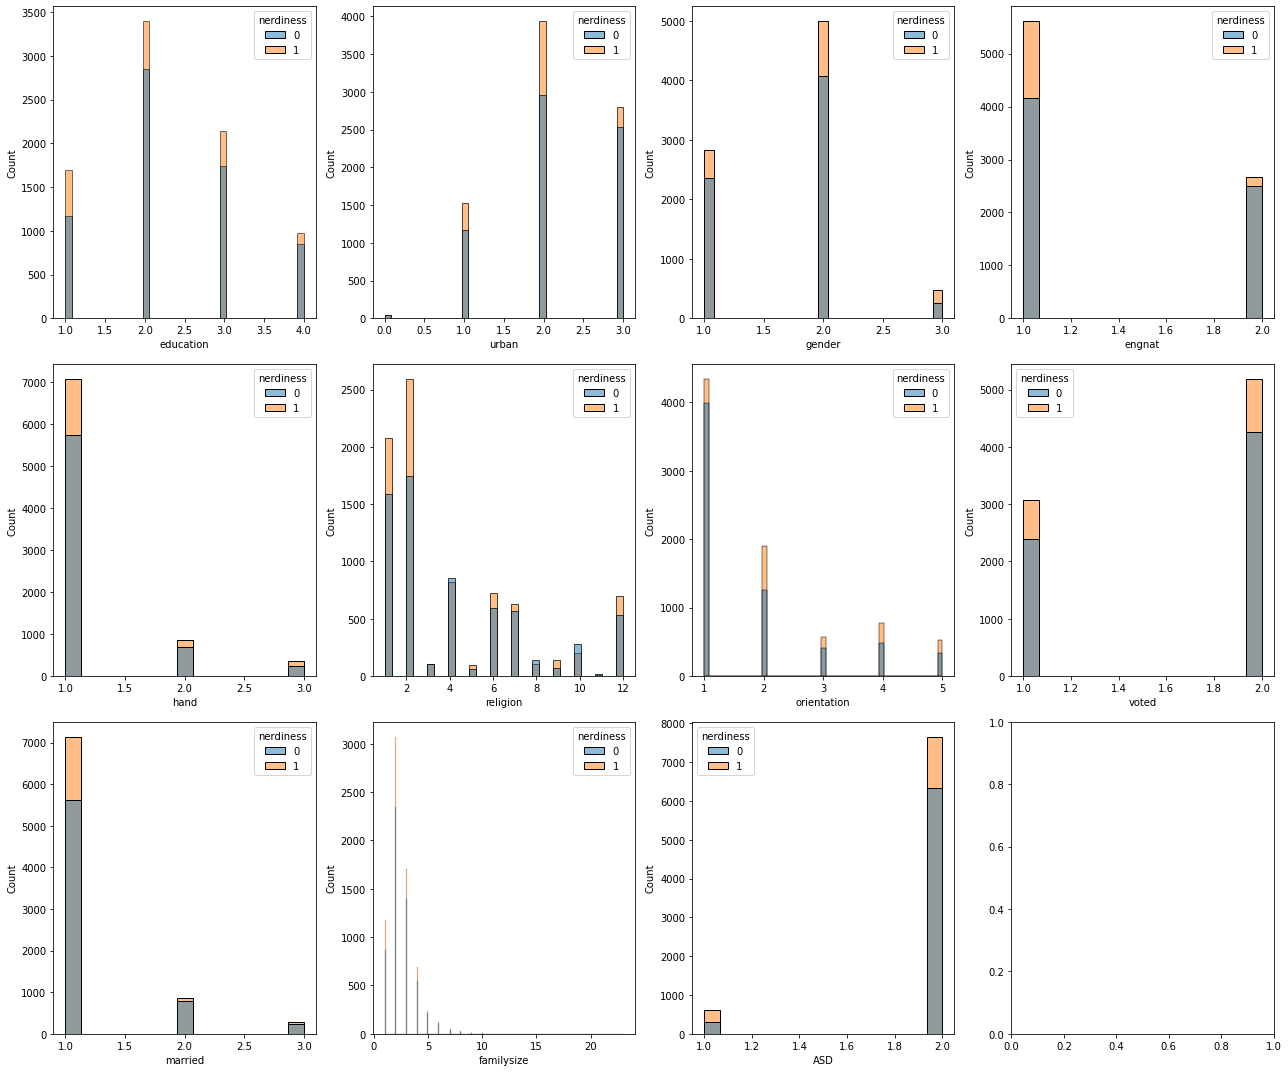

In [29]:

##temp_age = train[train['age'] < 100].dropna()              ## 나이
temp_edu = train[['education','nerdiness']].dropna()       ## 교육수준
temp_asd = train[['ASD','nerdiness']].dropna()
temp_marry = train[['married','nerdiness']].dropna()
temp_hand = train[['hand','nerdiness']].dropna()
temp_religion = train[['religion','nerdiness']].dropna()
temp_urban = train[['urban','nerdiness']].dropna()
temp_voted = train[['voted','nerdiness']].dropna()
temp_orientation = train[['orientation','nerdiness']].dropna()
temp_gedner = train[['gender','nerdiness']].dropna()
temp_engnat = train[['engnat','nerdiness']].dropna()
##temp_country = train[['country','nerdiness']].dropna()
temp_family = train[train['familysize'] < 39].dropna()

##scatter_matrix(train_x_no_outli[])
survey_datas= [temp_edu,temp_urban,temp_gedner,temp_engnat,temp_hand,temp_religion,
               temp_orientation,temp_voted,temp_marry,temp_family,temp_asd]

survy_no_cntry_age = survy_cols.copy()
survy_no_cntry_age.remove('country')
survy_no_cntry_age.remove('age')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18,15))
axes = axes.flatten()

for d, ax, col in zip(survey_datas, axes.ravel(), survy_no_cntry_age):
    sns.histplot(data=d, x=col, hue=d["nerdiness"],ax=ax)
    fig.tight_layout()


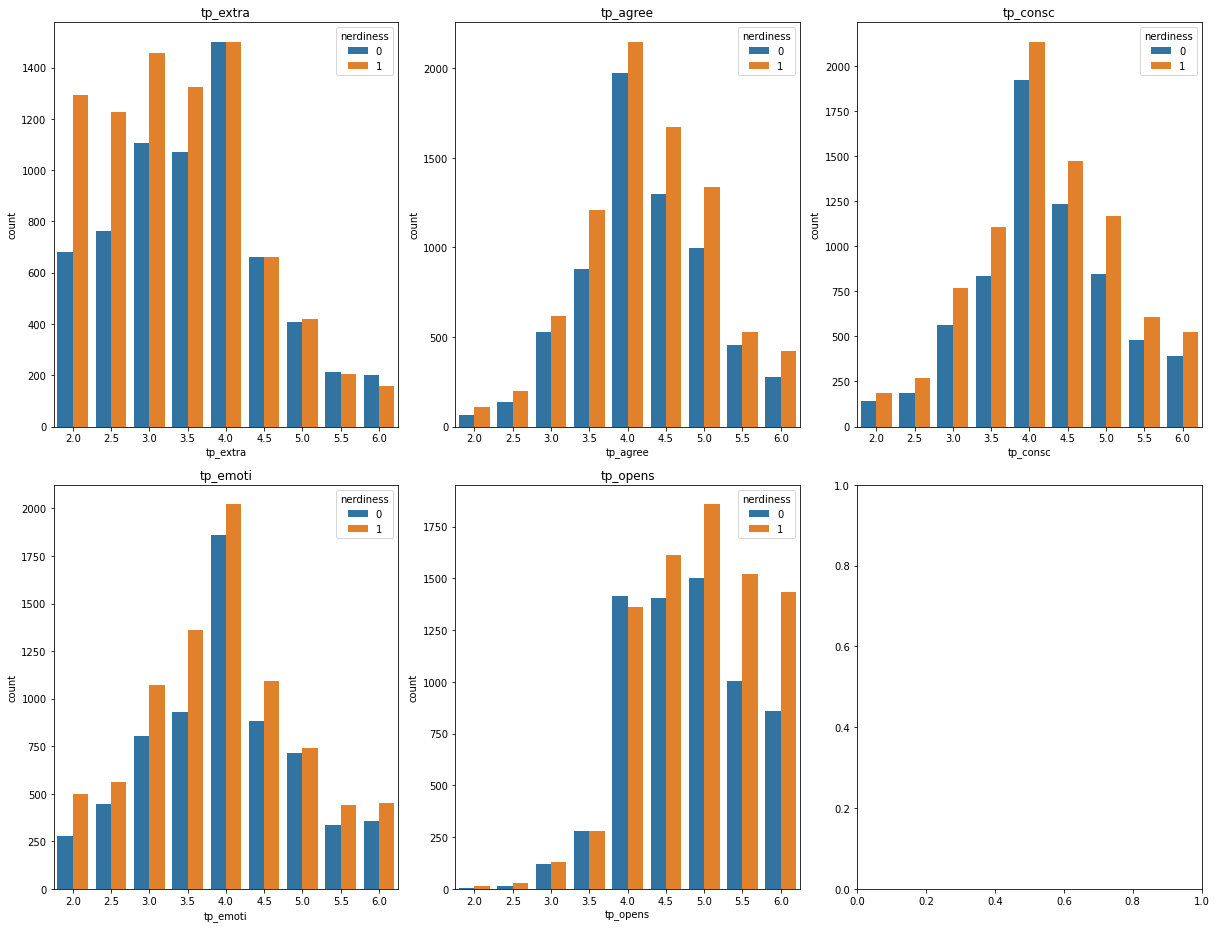

In [30]:
temp_tipi = calcTIPI(train[tipi_cols+['nerdiness']].dropna()) ## 14852 개의 Row
tp_cat = ['tp_extra', 'tp_agree','tp_consc','tp_emoti','tp_opens' ] 

fig,axes = plt.subplots(2,3, figsize=(17,13))
for f, ax in zip (tp_cat, axes.ravel()):
    sns.countplot(data=temp_tipi[[f]], x=f,ax=ax, hue=temp_tipi['nerdiness'])
    ax.set_title(f)
    fig.tight_layout()

+ 경험에 대한 개방성(tp_opens)과, 외향성(tp_extra)의 경우, Nerdiness 와 Non-Nerdiness 와의 유의미한 비중 차가 존재하므로, 해당 Column 들은 반드시 추가. 친화성(tp_agree), 성실성(tp_consc), 정서적 안정성(tp_emoti)의 경우, 모든 점수 구간에서, Nerd 의 비중이 높으므로, 상대적으로 경험 개방성과, 외향성에 비해 좋은 nerdiness 구분 지표가 되지는 못하나, 그 분포가 정규화된 형태 + 너무 많은 Feature 가 Drop 될 것을 고려하여 일단 학습에 포함시킴
   + 추후, 2차 데이터 정제 시, 제외시키도록하겠음.

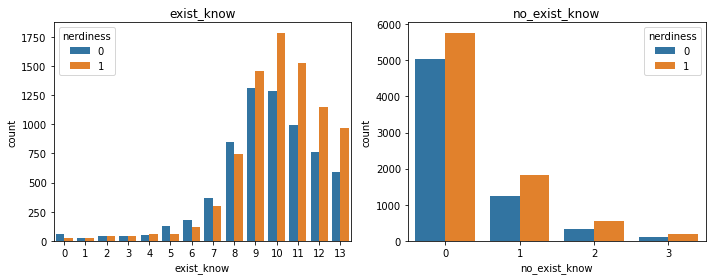

In [31]:
temp_vcl_temp = train[vcl_cols+['nerdiness']].copy()
vcl_no_exist = ['VCL6','VCL9','VCL12']     ## 존재하지 않는 단어
vcl_exist = vcl_cols.copy()                ## 존재하는 단어  
 
for no_wr in vcl_no_exist:
    vcl_exist.remove(no_wr)
    
temp_vcl_temp['exist_know'] = temp_vcl_temp[vcl_exist].sum(axis=1)    ## 존재하는 단어들 중 아는 것의 개수
temp_vcl_temp['no_exist_know'] = temp_vcl_temp[vcl_no_exist].sum(axis=1)    ## 존재하지 않는 단어들 중 아는 것의 개수


fig,axes = plt.subplots(1,2, figsize=(10,4))
for f, ax in zip (['exist_know', 'no_exist_know'], axes.ravel()):
    sns.countplot(data=temp_vcl_temp[[f]], x=f,ax=ax, hue=temp_vcl_temp['nerdiness'])
    ax.set_title(f)
    fig.tight_layout()

+ 실존하지 않음에도 안다고 체크한 단어의 개수는, 0 에서 가장 많은 응답을 보임 (이는 nerd 라고 진단한 사람(1), 그렇지 않은 사람(0) 모두 동일하다.) 또한 동시에, 개수에 따라, Nerd-NonNerd 진단 비율은 차이가 없다. 해당 Column 은 학습에 큰 영향을 끼치지 못할 것이므로, 학습 데이터에 포함시키지 않는다. (VCL6, VCL9, VCL12 Column 들 또한 삭제)
+ 반면에, 안다고 체크한 실존 단어들의 개수에 대한 응답을 봤을 때, 아는 단어의 개수가 9개 이상인 응답에서는, nerd 라고 진단한 사람의 비율은. 그렇지 않은 사람들보다 높았다. 이 비율의 차는 10개서부터 유의미할 정도로 벌어진다. 따라서, 실존 단어들 중 아는 단어의 개수가 많을 수록, Nerd 일 확률이 높아지므로, exist_know Column을 학습데이터에 포함시킨다.(동시에, VCL1, VCL2,VCL3, VCL4, VCL5,VCL7,VCL8,VCL10,VCL11, VCL13,VCL14,VCL15,VCL16,VCL17,VCL18,VCL19,VCL20,VCL21,VCL22,VCL23,VCL24,VCL25,VCL26)

  + country 의 경우, 127 개의 셋이 존재.추후 진행할 One-Hot 인코딩 시, Feature 크기가 엄청나게 증가, 모델 학습에 시간을 상당히 잡아먹게할 것.
  + 따라서,국가 내 nerdiness 비율을 오름차순으로 정렬하고, 비율에 대한 구간으로 그룹화하여 관리하는 것이 좋을 것으로 보임. 그룹핑을 1 ~ 0.6, 0.6 ~ 0.4, 0.4 ~ 0.2,  그 외 이렇게 분류도 가능

In [58]:
temp_country = train[['country','nerdiness']].dropna()
pd.set_option("display.max_rows", None)
temp_country['country'].value_counts()


USA    7419
GBR    1109
CAN     915
AUS     525
DEU     473
PHL     261
BRA     240
IND     233
POL     210
FRA     208
ITA     186
NLD     175
SWE     152
MEX     136
FIN     133
NZL     124
MYS     121
IDN     110
NOR     106
SGP     102
ESP      94
DNK      91
ROU      87
IRL      79
ARG      74
PRT      73
TUR      70
RUS      63
CZE      62
HUN      56
BEL      55
GRC      54
ZAF      52
CHL      49
AUT      48
CHE      47
ISR      44
SRB      38
HRV      35
JPN      32
HKG      31
THA      30
BGR      30
ARE      28
PAK      27
UKR      22
SVN      21
KOR      21
LTU      20
LVA      20
SVK      19
VEN      17
COL      16
PRI      15
KEN      15
PER      15
URY      14
CRI      14
SAU      12
EST      12
VNM      12
IRN      11
BIH      11
TWN      11
EGY      10
JOR      10
HND       9
KWT       9
ALB       8
NGA       8
CHN       8
ISL       8
QAT       8
JAM       7
TTO       7
DOM       6
MKD       5
BGD       5
BHS       4
BHR       4
GEO       4
GHA       4
GUM       4
ECU 

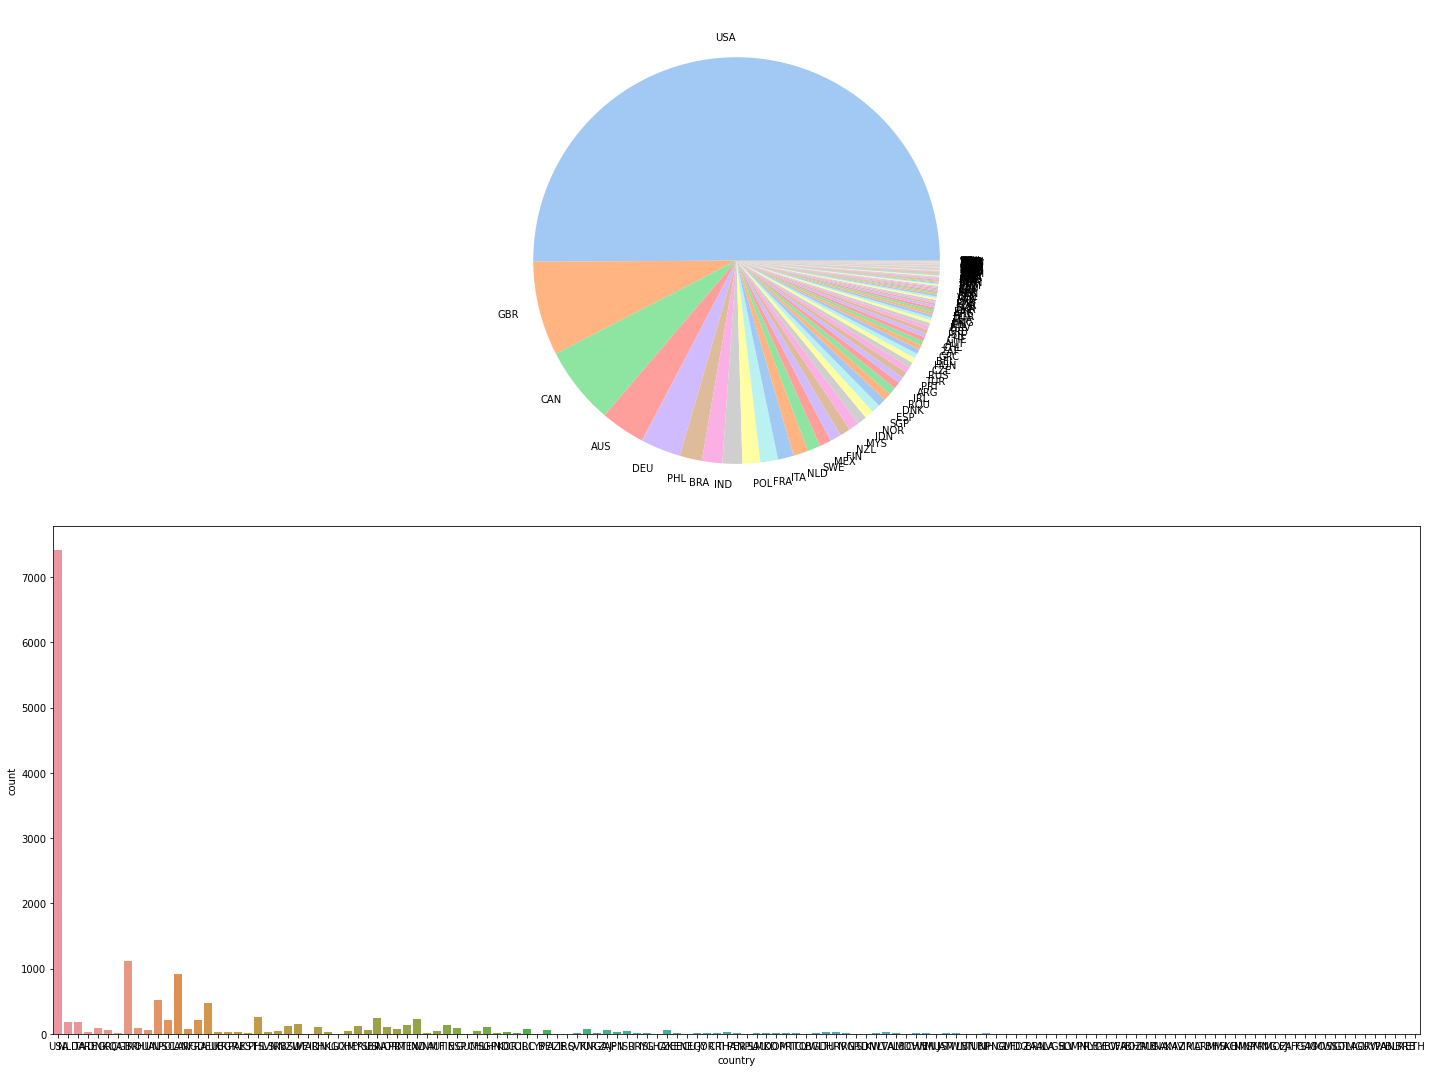

In [59]:
native_country_table=temp_country['country'].value_counts()
country_count = temp_country['country'].unique().shape[0]

colors = sns.color_palette('pastel')[0:country_count]
#create pie chart
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.pie(temp_country['country'].value_counts(),labels=native_country_table.index,colors=colors)
plt.subplot(2,1,2)
sns.countplot(data=temp_country, x="country")

#sns.countplot(data=train, x="native.country")
plt.tight_layout()
plt.show()

+ USA, GBR, CAN, AUS, DEU 순으로 굉장히 많고, 나머지 국가들은 희소

Chi2 Statistic: 277.8953617752413, p-value: 8.81854727933913e-12


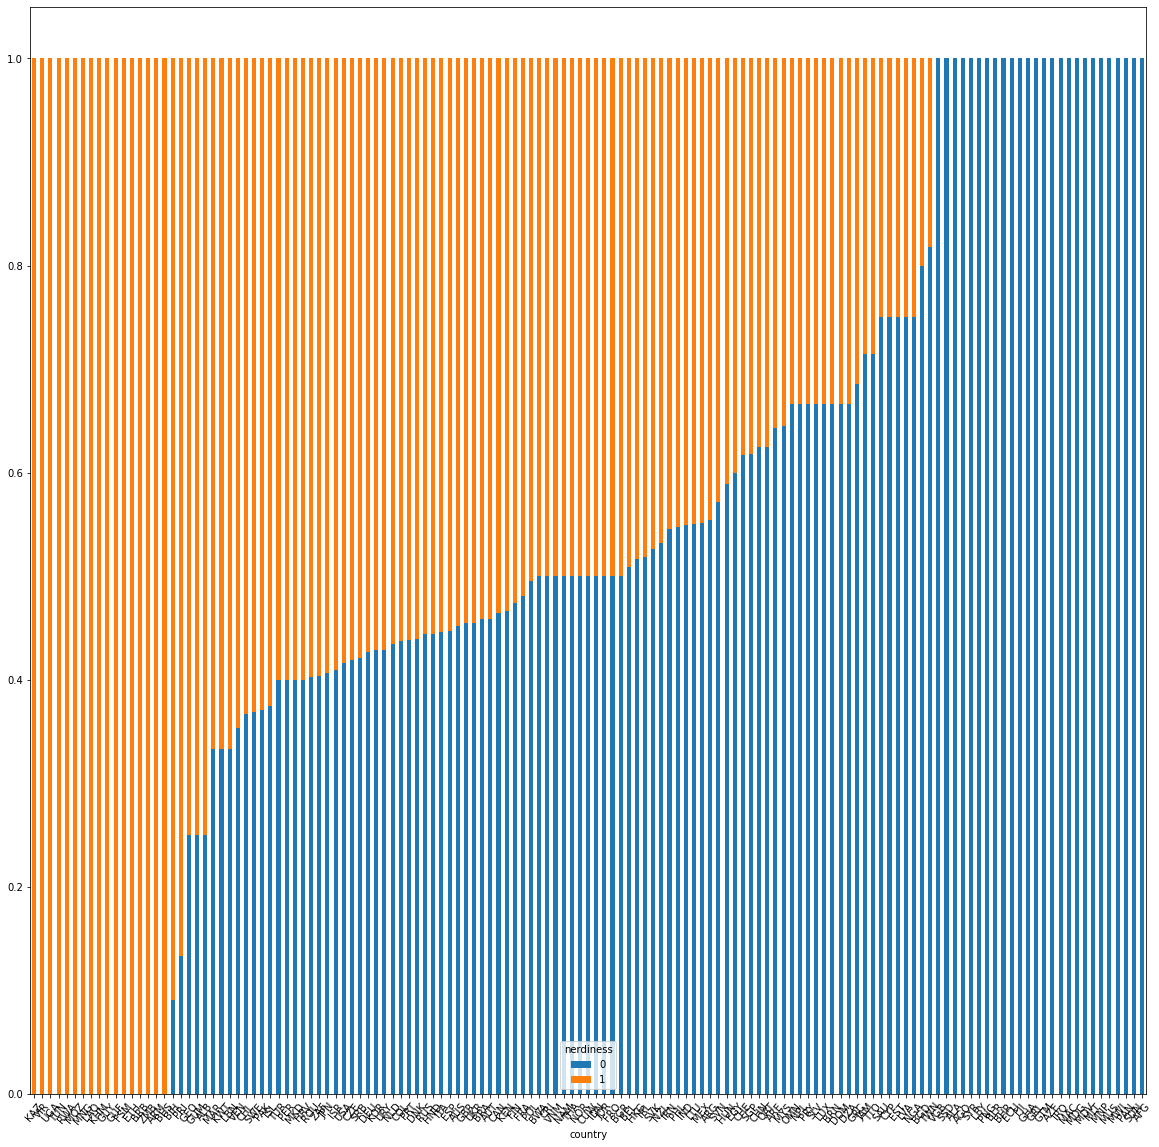

In [60]:

country_crosstab=pd.crosstab(temp_country['country'],temp_country['nerdiness'])
country_crossgtab_res=ss.chi2_contingency(country_crosstab)

print('Chi2 Statistic: {}, p-value: {}'.format(country_crossgtab_res[0], country_crossgtab_res[1]))

#ratio plot 제작
def ratio_table(cross_tab):
    return cross_tab.div(cross_tab.sum(axis=1),axis='index')

country_ratio=ratio_table(country_crosstab)
country_ratio=country_ratio.sort_values(by=0)

country_ratio.plot(kind='bar',stacked=True, figsize=(20,20))
plt.xticks(rotation=50)
plt.show()


In [61]:
prob_dict=dict(country_ratio[1])

group1=[]
group2=[]
group3=[]
group4=[]

for country in temp_country['country'].unique():
    country_data=temp_country[temp_country['country']==country]['nerdiness']
    probs=sum(country_data)/country_data.count()
    if probs <= 1 and probs >=0.6:
        group1.append(country)
    elif probs >=0.4 and probs <0.6:
        group2.append(country)
    elif probs >= 0.2 and probs < 0.4:
        group3.append(country)
    else:
        group4.append(country)

In [62]:
print('group1 :',group1)
print()
print('group2 :',group2)
print()
print('group3 :',group3)
print()
print('group4 :',group4)

group1 : ['PAK', 'SWE', 'MAR', 'GUM', 'CHL', 'TUR', 'ISL', 'PER', 'MKD', 'PRI', 'HRV', 'KWT', 'ALB', 'VEN', 'LBN', 'TUN', 'BIH', 'GUF', 'GEO', 'ZMB', 'UGA', 'KAZ', 'VIR', 'ARM', 'BHS', 'KHM', 'MNG', 'MOZ', 'FSM', 'LAO', 'GUY', 'RWA', 'BRB', 'ETH']

group2 : ['USA', 'NLD', 'ITA', 'DNK', 'GBR', 'ROU', 'HUN', 'AUS', 'POL', 'CAN', 'ARG', 'FRA', 'DEU', 'UKR', 'BGR', 'PHL', 'SVN', 'SRB', 'NZL', 'IDN', 'HKG', 'RUS', 'BRA', 'NOR', 'PRT', 'MEX', 'IND', 'VNM', 'AUT', 'FIN', 'ESP', 'HND', 'KOR', 'COL', 'IRL', 'BEL', 'SVK', 'ZAF', 'JPN', 'ISR', 'URY', 'CZE', 'KEN', 'EGY', 'JOR', 'CRI', 'THA', 'CUW', 'LTU', 'IRN', 'BWA', 'FRO', 'NAM']

group3 : ['ARE', 'GRC', 'QAT', 'EST', 'LUX', 'CHE', 'MYS', 'SGP', 'CYP', 'NGA', 'NPL', 'SAU', 'DOM', 'TTO', 'BGD', 'LVA', 'CHN', 'JAM', 'DZA', 'BRN', 'SLV', 'OMN', 'PRY']

group4 : ['AZE', 'IRQ', 'GHA', 'ECU', 'GRL', 'SDN', 'MDV', 'MUS', 'TWN', 'PNG', 'MDG', 'ALA', 'VGB', 'LBY', 'BHR', 'MLT', 'MAC', 'MNP', 'SYR', 'FJI', 'AFG', 'AGO', 'MWI', 'SSD', 'GTM', 'PAN', 'BLR'

In [63]:
train_groupCntry = train_x_no_outli.copy()
train_groupCntry['country']=train_groupCntry['country'].replace(group1,0)
train_groupCntry['country']=train_groupCntry['country'].replace(group2,1)
train_groupCntry['country']=train_groupCntry['country'].replace(group3,2)
train_groupCntry['country']=train_groupCntry['country'].replace(group4,3)

+ age 와, familysize, hand, married, orientation, ASD 의 경우, 데이터가 한쪽에 분포하는 경향이 심하고(정규화된 형태가 아니고), Nerditiy, Non-Nerdity 분포 또한 뚜렷하게 구분이 불가능하기에, 학습 데이터/테스트 데이터에서 제거

<AxesSubplot:xlabel='age', ylabel='Count'>

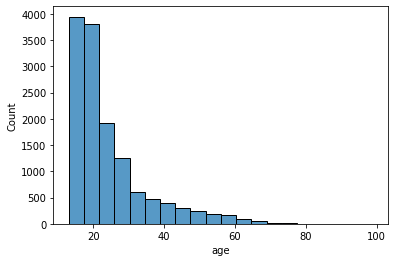

In [69]:
sns.histplot(train_x_no_outli['age'],bins=20)

<AxesSubplot:xlabel='familysize', ylabel='Count'>

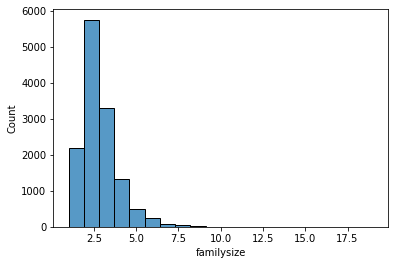

In [74]:
sns.histplot(train_x_no_outli['familysize'],bins=20)

+ <b>country, urban, gender, engnat, hand, religion, orientation, voted, married, ASD와 Nerrdity 관계 파악</b>
  + Country 는 norminal 범주값 (숫자값의 순서와는 상관없는 범주형 값), Nerdity 역시, norminal 범주값이므로, <b>이들간의 correlation 파악은, Cramer's V 척도</b> 사용하여 파악
  + Cramer's V 척도<br>: 두 이산형($=$ 범주형) 변수에 대한 관계를 측정하는데 사용되며, 계수값은 0~1 사이에 값을 가짐.
    + 0 : 두 범주형 변수(이산형 변수) 간에는 아무런 관련성도 없다.
    + 1 : 두 범주형 변수 간에는 서로 강한 관련성이 있다.
    > 출처1:https://www.statology.org/correlation-between-categorical-variables/ <br>
    > 출처2:https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/

In [32]:
def cramers_corrected_stat(confusion_matrix):                           ## 이건 건들 필요 없음
    X2 = ss.chi2_contingency(confusion_matrix, correction=False)[0]
    N = np.sum(confusion_matrix)
    minimum_dimension = min(confusion_matrix.shape)-1
  
    # Calculate Cramer's V
    result = np.sqrt((X2/N) / minimum_dimension)
  
    # Print the result
    return result

In [65]:

norminal_cols = ['country','urban','gender','engnat','hand','religion','orientation','voted','married','ASD'] ## Norminal 범주값 (이산형 + 범주형)을 갖는 Column들

for col in norminal_cols:
    no_nan_rows = train_x.dropna(subset=[col], inplace=False)     ## 결측치 가진 행 제거
    cross_tab = pd.crosstab(train_y,no_nan_rows[col], margins=True)
    
    nerd0_group = cross_tab.loc[0].to_numpy()            # nerdiness 값이 0 인 Row(에서 country 값들에 대한 통계) 
    nerd1_group = cross_tab.loc[1].to_numpy()
    confusion_matrix= np.stack([nerd0_group,nerd1_group])
    
    print(f"nerdity-{col} 의 Cramer's V 계수 값 : {cramers_corrected_stat(confusion_matrix)}")


nerdity-country 의 Cramer's V 계수 값 : 0.0968608156874568
nerdity-urban 의 Cramer's V 계수 값 : 0.030481794165958948
nerdity-gender 의 Cramer's V 계수 값 : 0.03213087369002505
nerdity-engnat 의 Cramer's V 계수 값 : 0.03953042898522551
nerdity-hand 의 Cramer's V 계수 값 : 0.01236003068773039
nerdity-religion 의 Cramer's V 계수 값 : 0.0691319867208462
nerdity-orientation 의 Cramer's V 계수 값 : 0.05768488972767858
nerdity-voted 의 Cramer's V 계수 값 : 0.009323394765736417
nerdity-married 의 Cramer's V 계수 값 : 0.020768139679407997
nerdity-ASD 의 Cramer's V 계수 값 : 0.04004415310700152


+ <b>연속형 변수 (age, introelapse, testelpase, surveyelapse)와 Nerdiness 관계 파악</b>

### Column들 조합하여 새로운 Column 추가

+ <b>TIPI 10개 문항들을 조합하여, 5개의 항목에 대한 점수로 변환</b>
  + 친화성 (TIPI 7번과 2번)
  + 외향성 (TIPI 1번과 6번)
  + 성실성 (TIPI 3번과 8번)
  + 정서적 안정성 (TIPI 9번과 4번)
  + 경험에 대한 개방성 (TIPI 5번과 10번)

In [66]:
def calcTIPI(dframe):
    tp_enc = dframe.copy()
    tp_enc['tp_extra'] = (dframe['TIPI1'] + (8-dframe['TIPI6']))/2 ## 외향성 
    tp_enc['tp_agree'] = (dframe['TIPI7'] + (8-dframe['TIPI2']))/2 ## 친화성
    tp_enc['tp_consc'] = (dframe['TIPI3'] + (8-dframe['TIPI8']))/2 ## 성실성
    tp_enc['tp_emoti'] = (dframe['TIPI9'] + (8-dframe['TIPI4']))/2 ## 정서적 안정성
    tp_enc['tp_opens'] = (dframe['TIPI5'] + (8-dframe['TIPI10']))/2 ## 경험에 대한 개방성
    
    return tp_enc

### 'Column 들 간 관계 파악' 에서 얻은 Insight 기반으로 새로운 Column 을 Drop, 추가 해봅시다.

In [36]:
def addColumn(dframe):
    tmp_frame=dframe.copy()
    tmp_frame['test_score'] = dframe[test_cols].sum(axis=1)
    tmp_frame['exist_know'] = dframe[vcl_exist].sum(axis=1)
    tmp_frame['mean_test'] = dframe[['testelapse']].sum(axis=1)/26   ## 테스트 문항 별 평균적 응답시간 추가
    tmp_frame['mean_srvy'] = dframe[['surveyelapse']].sum(axis=1)/39  ## 설문 문항 별 평균적 응답시간 추가
    tmp_frame = calcTIPI(tmp_frame)
    
    return tmp_frame

def dropColumn(dframe):
    left_list = test_cols.copy()
    left_list.remove('Q15')
    left_list.remove('Q25')
    tmp_frame = dframe.copy()
    
    tmp_frame = tmp_frame.drop(left_list,axis=1) ## Q Test Drop
    tmp_frame = tmp_frame.drop(vcl_cols,axis=1)  ## VCL Drop
    tmp_frame = tmp_frame.drop(tipi_cols,axis=1) ## tipi cols
    tmp_frame = tmp_frame.drop(time_cols,axis=1)  ## introelasep 제거
    tmp_frame = tmp_frame.drop(['familysize','age','orientation','hand','married','ASD'],axis=1)
    return tmp_frame

In [9]:
## 이상치 제거, 결측치 처리된 Dataframe 대상으로 새로운 Column 들 추가 후, 기존 일부 Column들 제거
train_final = addColumn(train_x_no_outli)
train_final = dropColumn(train_final)

### 연속형 및 일부 이산형(familysize) 변수들 표준화

+ <b> 이산형/범주형 변수들 One-Hot Encoding</b>

### 범주형으로 추정된 값 인코딩 

+ 범주형 값(추정된 Column 포함)은 다음과 같음
  + gender
  + engnat
  + urban
  + hand
  + religion
  + orientation
  + voted
  + married
  + ASD
  + country

+ country 특성값을 One-Hot 인코딩시켜보자
  + 왜 Ordinal Encoding (각각의 나라마다 숫자를 매핑) 을 하지 않는가?<br>: 서로 다른 138 개의 숫자 간에는 대소 관계가 존재. 해당 대소 관계가 Model 학습 과정 시, country 특성값의 의미를 왜곡시킬 수 있음
    > 자세한 것은 '01.California_Housing_1990s.ipynb' 파일의 '문자열/범주형 데이터 셋 다루기' 항목 참고.

In [57]:
from sklearn.preprocessing import OneHotEncoder

train_final_ohe = train_final.copy()
categorical_cols = ['country','urban','gender','engnat','religion','voted']
    
for col in categorical_cols:
    col_ohe = pd.get_dummies(train_final_ohe[col], prefix=col)
    train_final_ohe = pd.concat((train_final_ohe, col_ohe), axis=1).drop(col, axis=1)
    

### 평균 시간값들에 대해 정규화 진행

+ 평균 시간값들의 경우, 편차가 굉장히 크면서, 종분포를 가지므로, Z-Score 정규화를 통해, 학습에 유리한 데이터 분포를 형성 가능

In [ ]:
tmp_stdz_frame =train_final_ohe.copy()
col_stdize = ['mean_test', 'mean_srvy']
scaler = StandardScaler()
numeric_df = pd.DataFrame(scaler.fit_transform(tmp_stdz_frame[col_stdize]),columns=col_stdize,index=tmp_stdz_frame.index)
X_train_new = tmp_stdz_frame.drop(columns=col_stdize)
train_final_ohe_stdize =pd.concat([numeric_df,X_train_new],axis=1)